In [5]:
#Tables and matrices
import numpy as np
import pandas as pd

#Stats
import scipy.stats as st
from scipy.optimize import fmin
from scipy import integrate
from scipy.stats.mstats import mquantiles


#Probabilistic programs
#!pip install numpy mkl #if you are in an intel machine i.e. in mac M# chips no
#!pip install pymc
#!pip install pytensor
import pymc as pm
import pytensor.tensor as pt
#import aesara.tensor as at
print('Running on PyMC v{}'.format(pm.__version__))


#Graphs 
#IMPORTANT: properly install ipywidgets and nodejs for interactive graphs
#If you are in jupyterlab, activate the widget extension (it should be in the latest versions)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from matplotlib import animation, rc
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, HBox, VBox, Layout
from mpl_toolkits.mplot3d import axes3d
import arviz as az

Running on PyMC v5.10.3


# Posteriors, priors, & likelihoods


 
| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/Bayes1.png" width = "300" height = '300'> |  |  <img src="1_CB/Bayes2.jpg" width = "300" height = '300'>  |  




| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/Bayes3.jpg" width = "300" height = '300'> |  |  <img src="1_CB/Bayes4.png" width = "300" height = '300'>  |  


| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/EV_vs_GAS.jpg" width = "300" height = '300'> |  |  <img src="1_CB/Lithium_Needs.png" width = "500" height = '500'>  |  


| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/SBF.webp" width = "400" height = '400'> |  |  <img src="1_CB/SBF_2.png" width = "500" height = '500'>  |  


| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| <img src="1_CB/AGI.jpg" width = "300" height = '300'> |  |  <img src="1_CB/vanRooij.png" width = "400" height = '400'>  |  


| Prior (beliefs)  | <font size = '20'>   <pre>  </pre> </font>  | Likelihood (data) |   
|:---:|---|:---:|
| This X market segment will grow |  |  Sales from that segment grew  |  



Bayes found how to combine priors y likelihoods


$$ Posterior = \frac{Prior \times Likelihood}{Marginal} $$

Same formula, different "names"

$$ Belief_{t+1} = \frac{Belief_t \times Likelihood}{Marginal} $$

Same formula expanded


$$ p(Hypothesis|Data) = \frac{p(Hypothesis) \times p(Data|Hypothesis)}{p(Data)} $$

# Theorem's proof

<center><img src="1_CB/Bayes6.svg" width = "600" height = '600'></center> 


<center><img src="1_CB/Bayes7.svg" width = "600" height = '600'></center> 


<center><img src="1_CB/Bayes8.svg" width = "600" height = '600'></center> 


# Visualization of posteriors, priors, y likelihoods

## Hipotheses space (events)
<center><img src="1_CB/Bayes9.svg" width = "400" height = '400'></center> 


## Hipotheses space (events)
<center><img src="1_CB/Bayes10.svg" width = "400" height = '400'></center> 


## Priors
<center><img src="1_CB/Bayes11.svg" width = "600" height = '600'></center> 


## Data
### Marginal: overall probability of the data, across all priors (gray divided by the hypotheses space area)


<center><img src="1_CB/Bayes12.svg" width = "550" height = '550'></center> 


## Likelihoods
<center><img src="1_CB/Bayes13.svg" width = "550" height = '550'></center> 


<center><img src="1_CB/Bayes14.svg" width = "550" height = '550'></center> 



<center><img src="1_CB/Bayes15.svg" width = "550" height = '550'></center> 


## Posterior

<center><img src="1_CB/Bayes16.svg" width = "550" height = '550'></center> 


## Posterior vs. likelihood
<center><img src="1_CB/Bayes17.svg" width = "700" height = '700'></center> 

# A simple binary case

Frequentist probability: frequency of events; there is a point estimate

|Problem|Data|$\theta$|
|:-------:|:-------:|:-------:|
|<img src="2_CB/Coin_cara.png" width = "105" height = '105'>|1 head, 6 tails|$\frac{1}{7}$|

Bayesian probability: beliefs; there is a distribution over the potential estimate

|Problem|Data|$\theta$|
|:-------:|:-------:|:-------:|
|<img src="2_CB/Coin_cara.png" width = "105" height = '105'>|1 head, 6 tails|<img src="2_CB/beta.svg" width = "200" height = '200'>|


Bayes lure: 

We can combine prior knowledge about an hypothesis ($p(\theta))$ and update that prior with data to obtain a new posterior belief/knowledge ($p(\theta|data)$).

$$ p(\theta|data) = \frac{p(data|\theta)p(\theta)}{p(data)}$$

Today's posterior is the future prior

Prior: lands heads 50% of the times. <br>
Data: after 10 throws, only lands heads once <br>
Posterior: lands heads 35% of the times (under some likelihood)

# Where do posteriors come from?

The Bayesian setup requires to define likelihoods and priors to obtain a posterior belief after observing data:
<center><img src="2_CB/bayes_framework.gv.svg" width = "350" height = '350'></center>

The posterior comes from a) analytical solutions or b) computational methods (the majority)

### Let's see a pair of analytical solutions:
1) Beta posterior
2) Normal posterior

### Analytical derivation of a Beta posterior 
###### Likelihood: Bernoulli
###### Prior: Beta
###### Posterior: Beta (we will prove this)


Data: binary and independent (e.g. heads-tails; point-no point; pass-fail; happy-unhappy)

Objective: to estimate the latent probability of one of the binary outcomes

Model: Beta (prior) - Bernoulli (LH)

<center><img src="2_CB/beta_bernoulli.svg" width = "600" height = '600'></center>

Prior (our model for beliefs) & likelihood (our model for the data):

$$posterior \propto Beta \times Bernoulli$$


Let's plug in the formulas

$$P(\theta|successes,tries,\alpha,\beta,p) \propto \frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha,\beta)} \times p^{successes}(1-p)^{tries-successes}$$

pars = $\alpha,\beta,p$ <br>
N = tries<br>
z = successes

After some algebra we realize that multiplying a Beta and a Bernoulli function results in:

$$ p(\theta|z,N,\alpha,\beta) \sim beta(z+\alpha, N-z+\beta) $$ 

The posterior includes data (N,z) and previous beliefs ($\alpha$, $\beta$).

We started with a beta for the prior and a Bernoulli for the likelihood. We ended with a posterior beta, thus the prior was a conjugate (https://en.wikipedia.org/wiki/Conjugate_prior).


In [6]:
# Interactive plot. Belief update after data
theta_real = 0.375 #heads probability (this is the one we want to infer; in the real world we do not know it)
def posterior_beta(lanzamientos, a, b):
    #Likelihood: observed heads follow a Bernoulli
    #Prior: Beta with parameters a, b 
    
    #Experiment (data)
    np.random.seed(seed=1144)
    caras = st.bernoulli.rvs(theta_real, size=lanzamientos).sum() #heads
    
    #Prior (belief)
    prior_par = np.array([a,b]) 
    
    #Posterior (updated belief)
    #Obtained analytically
    nsims = 10000
    a = caras + prior_par[0]
    b = lanzamientos - caras + prior_par[1]
    posterior_samples = np.sort(st.beta.rvs(a = a, b = b, size = nsims)) 
    posterior_pdf = st.beta.pdf(x = posterior_samples, a = a, b = b)
    
    #Graph
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    idx1 = np.where(posterior_samples>=np.percentile(posterior_samples,q=2.5))[0][0]
    idx2 = np.where(posterior_samples>=np.percentile(posterior_samples,q=97.5))[0][0]
    text = "[" + str(np.round(posterior_samples[idx1],3)) +\
    "," + str(np.round(a/(a+b),3)) +\
    "," + str(np.round(posterior_samples[idx2],3)) + "]"
    ax.plot(posterior_samples, posterior_pdf,'r-', lw=5, alpha=0.8, 
            label = '[2.5%, mean, 97.5%]  = ' + text)
    ax.set_title('Posterior (belief of heads) \n Real prob.: ' + str(theta_real))
    ax.set_xlabel('Heads probability')
    ax.set_ylabel('Density')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1.2*np.max(posterior_pdf)])
    ax.legend(loc = 'upper right')
    

In [7]:
w_experimento = widgets.BoundedIntText(value = 3, description = 'Throws: ',
                                      min = 1, max = 1000000)
w_prior_par_a = widgets.BoundedIntText(value = 1, description = 'Prior par a: ',
                        min = 1, max = 1000000)
w_prior_par_b = widgets.BoundedIntText(value = 1, description = 'Prior par b: ',
                        min = 1, max = 1000000)
out = widgets.interactive_output(posterior_beta, 
                                 {'lanzamientos': w_experimento, 
                                  'a': w_prior_par_a, 'b': w_prior_par_b})
left_widgets = VBox([w_experimento])
right_widgets = VBox([w_prior_par_a, w_prior_par_b])
top = HBox([left_widgets, right_widgets])
VBox([top, out])


Example 2; based on Kahneman, 2011, Thinking, Fast, and Slow.

Objective: guess the profession.

Charles is shy, kind, but with little interest in socializing. He likes order and is precise in his work.

¿Electrical Engineer or Business major?


Kahneman found that the majority would say electrical engineer. <br>
Why? <br>
Judgment guided by the likelihood that Charles' observables are more likely in an engineer? <br>
Do we neglect the prior that more people study Business?

In [32]:
#Example: electrical engineer or business major.
#Based on: Davidson-Pilon (2015).
def posterior_beta_carlos(a_prior, b_prior, data_experimento):
    #Bayes
    prior_par = np.array([a_prior,b_prior])
    prior_mean = [a_prior/(a_prior+b_prior), 1 - a_prior/(a_prior+b_prior)]
    nsims = 10000
    juicio_ing = data_experimento[0] #people that said engineer
    juicio_todos = data_experimento.sum() #whole sample
    a =  juicio_ing + prior_par[0] #we will see later in the course why a, b take this form (bernoulli-beta model)
    b = juicio_todos - juicio_ing + prior_par[1]
    posterior_mean = [a/(a+b), 1 - a/(a+b)] #With uniform prior
    
    a =  juicio_ing + prior_real[0]
    b = juicio_todos - juicio_ing + prior_real[1]
    posterior_real_mean = [a/(a+b), 1 - a/(a+b)] #With a data-based prior
    
    #Graph
    #With uniform prior
    #fig, ax = plt.subplots(1,2, figsize=(12, 3))
    fig, ax = plt.subplots(1,1, figsize=(12, 3))
    colors = ["#348ABD", "#A60628"]
    fig.suptitle('Prior and posteriors of professions')
    ax.bar([0, .7], prior_real, alpha=0.70, width=0.25, color=colors[0], label="Prior (data-based)",
            lw=3, edgecolor="#348ABD")
    ax.bar([0+0.25, .7+0.25], posterior_mean, alpha=0.7,
            width=0.25, color=colors[1], label="Posterior with uniform prior",
            lw=3, edgecolor="#A60628")
    ax.set_xticks([0.20, 0.95])
    ax.set_xticklabels(["Engineer", "Business"])
    #ax[0].set_title("Prior real y posterior de las profesiones de Carlos")
    ax.set_ylabel("Probability")
    ax.set_ylim([0,1.1])
    ax.legend(loc="upper right");


Data experiment: 
Electrical: 133798
Business: 44600


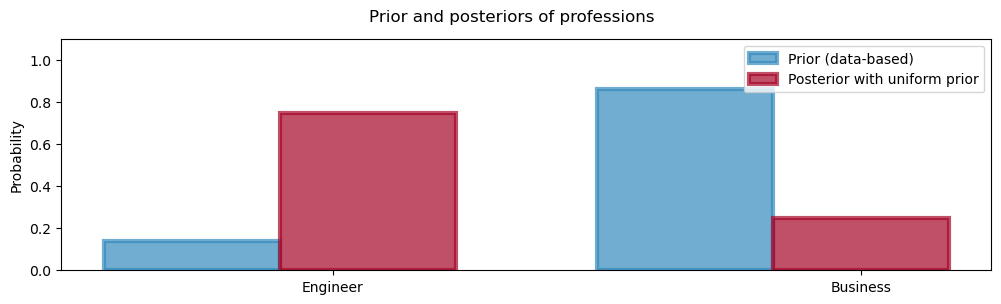

In [33]:
#Real data: Colombia, data min. educacion 2001-2018.
grad = np.array([24763, 153635]) #number of degrees [electrical, business]
prior_real = [grad[0]/grad.sum(), grad[1]/grad.sum()] 

#Experiment. We ask a lot of people and found the following number of
#people saying that Charles is: [electrical engineer, business major]
data_experimento = np.array([round(grad.sum()*3/4), round(grad.sum()*1/4)]) 
print('Data experiment: \nElectrical: ' + str(data_experimento[0]) + "\nBusiness: "  + str(data_experimento[1]))

#The real prior (blue), looks different from the observed beliefs (posterior, red)
#The posterior is robust to different priors. People are biased. 
#They use the likelihood: the probability of Carlos personality, given the hypothesis that
#he is an engineer 
posterior_beta_carlos(1, 1, data_experimento) 

What hypotheses or latent $\theta$ are interesting in finance, insurance, real sector, artificial intelligence, your industry?

For instance, [minute 16](https://www.youtube.com/watch?v=RY-M0tvN77s) or [minute 1](https://www.youtube.com/watch?v=twpZhNqVExc)

* Consumer acquisition costs
* Consumer life value
* Leadership
* Consume Preferences
* Product placement
* Innovation capacities
* Entrepreneurship
* Subjective utility
* Risk aversion
* Impulsivity (e.g. intertemporal discounting)
* Trust
* Selfishness 
* Altruism
* Empathy
* Psychopathy
* Perceptual sensitivity
* Math ability
* Capacity (in bits) of a learner
* Pragmatic interpretation of a sentence
* Object identity in the visual field
* Creativity
* Uncertainty
* Others



# Analytical derivation of a normal posterior 
### Likelihood: Normal
### Prior: Normal

Likelihood (normal)
$$ p(y|\theta) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(y-\theta)^2}$$

Prior (normal)
$$ p(\theta) = \frac{1}{\sqrt{2\pi}\tau_0}e^{-\frac{1}{2\tau_0^2}(\theta-\mu_0)^2}$$


The typical Bayesian setup, without the marginal, is to define likelihoods and priors: 
<center><img src="2_CB/bayes_framework.gv.svg" width = "350" height = '350'></center>

The typical Bayesian setup, without the marginal, is to define likelihoods and priors:

$$posterior \propto prior \times likelihood$$


Prior (our model for beliefs) & likelihood (our model for the data):

$$posterior \propto Normal (\mu_0,\tau_0^2) \times Normal(\theta,\sigma^2)$$


Let's plug in the formulas:

$$P(\theta|y, \sigma,\tau_0,\mu_0) \propto \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(y-\theta)^2}\times \frac{1}{\sqrt{2\pi}\tau_0}e^{-\frac{1}{2\tau_0^2}(\theta-\mu_0)^2}$$

After some algebra ...

The posterior is $Normal(\mu_1,\sigma_1^2)$

\begin{align}
P(\theta|y, \sigma,\tau_0,\mu_0) &\propto e^{-\frac{1}{\frac{2\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2}}\left(\left(\theta - \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2}\right)^2\right)}
\end{align}

$\mu_1 = \frac{(\sigma^2\mu_0 + \tau_0^2 y)}{\tau_0^2 + \sigma^2} = \frac{\tau_0^{-2}\mu_0 + \sigma^{-2} y}{\tau_0^{-2} + \sigma^{-2}}$ 

$\sigma_1 = \frac{\sigma^2\tau_0^2}{\tau_0^2 + \sigma^2} = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\tau_0^2}}$

Note: the 2nd equal in $\mu_1$ y $\sigma_1$ is obtained by dividing the numerator and denominator by $\frac{1}{\sigma^2\tau_0^2}$

Looks nasty but let's analyze the result:

$\mu_1 = \frac{\tau_0^{-2}\mu_0 + \sigma^{-2} y}{\tau_0^{-2} + \sigma^{-2}}$ 

$\sigma_1^2 = \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\tau_0^2}}$

The mean of the posterior is a compromise between data ($y$) and the prior mean ($\mu_0$). The compromise scales with the variance of the likelihood and the prior.

The posterior variance is always lower than the variance of the likelihood and the prior.

Note: if $y$ has n data points, change $y$ by it's mean and divide $\sigma^2$ by n; the final posterior is similar. 

Important Bayesian lesson (visually):

There is a "tug of war" between prior beliefs and likelihood of the data for the final posterior beliefs.

<center><img src="2_CB/Prior_vs_LH.svg" width = "551" height = '550'></center>